In [45]:
import numpy as np
from skimage.util import view_as_windows
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

# 1. Carregar os dados de treino e teste
X_train = np.load('Xtrain2_a.npy')  # Imagens de treino achatadas (formato (n_amostras, 49))
Y_train = np.load('Ytrain2_a.npy')  # Máscaras binárias correspondentes (formato (n_amostras,))
X_test = np.load('Xtest2_a.npy')    # Imagens de teste achatadas (formato (n_amostras, 49))

# 2. Redimensionar os dados para (7x7), pois as imagens são pequenas (format a)
# Cada imagem em X_train e X_test contém um patch de 7x7 ao redor de um pixel central
X_train_reshaped = X_train.reshape(-1, 7, 7)
X_test_reshaped = X_test.reshape(-1, 7, 7)

# Y_train são rótulos binários indicando se o pixel central é cratera (1) ou não (0)
Y_train_reshaped = Y_train.reshape(-1)

# Função para extrair patches de 7x7 de uma imagem 48x48
# Isso simula a visão local de um pixel em seu contexto
def extract_patches(imgs, patch_size=7):
    patches = []
    for img in imgs:
        # Extrai janelas de 7x7 para cada pixel da imagem
        img_patches = view_as_windows(img, (patch_size, patch_size))
        # Achata cada patch para um vetor 1D de 49 elementos
        img_patches = img_patches.reshape(-1, patch_size * patch_size)
        patches.append(img_patches)
    return np.vstack(patches)  # Retorna como um único array de patches

# 3. Extrair patches 7x7 para X_train e X_test
X_train_patches = extract_patches(X_train_reshaped)
X_test_patches = extract_patches(X_test_reshaped)

# Garantir que os rótulos (Y_train) estejam achatados
Y_train_flat = Y_train_reshaped.reshape(-1)

# Verificar as dimensões após a extração dos patches
print("Forma de X_train_patches:", X_train_patches.shape)  # (n_amostras, 49)
print("Forma de Y_train_flat:", Y_train_flat.shape)        # (n_amostras,)

# 4. Dividir o conjunto de treino para validação
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(
    X_train_patches, Y_train_flat, test_size=0.2, random_state=42
)

# 5. Treinar um classificador de Regressão Logística
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_split, Y_train_split)

# 6. Prever e avaliar no conjunto de validação
Y_val_pred = clf.predict(X_val_split)
balanced_acc = balanced_accuracy_score(Y_val_split, Y_val_pred)
print(f"Precisão Balanceada na validação: {balanced_acc:.4f}")

# 7. Prever os rótulos para o conjunto de teste
Y_test_pred = clf.predict(X_test_patches)

# Verificar o tamanho de Y_test_pred
print(f"Tamanho de Y_test_pred: {Y_test_pred.shape}")

# O tamanho total de Y_test_pred deve ser compatível com a reconstrução para imagens 48x48
num_pixels_por_imagem = 48 * 48  # Cada imagem de teste tem 48x48 pixels
tamanho_total = Y_test_pred.size
num_imagens = tamanho_total // num_pixels_por_imagem

if tamanho_total % num_pixels_por_imagem == 0:
    # Redimensionar para o formato original de imagem 48x48
    Y_test_pred_reshaped = Y_test_pred.reshape(num_imagens, 48, 48)
else:
    print("O tamanho de Y_test_pred não é compatível com (48, 48). Verifique o processamento.")

# 8. Visualizar algumas imagens de teste e suas previsões de máscara
if 'Y_test_pred_reshaped' in locals():
    num_amostras = min(5, num_imagens)  # Número de amostras para visualizar
    fig, axs = plt.subplots(num_amostras, 2, figsize=(10, 10))

    for i in range(num_amostras):
        # Exibir a imagem de teste original
        axs[i, 0].imshow(X_test_reshaped[i], cmap='gray')
        axs[i, 0].set_title(f'Imagem de Teste {i+1}')
        axs[i, 0].axis('off')

        # Exibir a predição da máscara
        axs[i, 1].imshow(Y_test_pred_reshaped[i], cmap='gray')
        axs[i, 1].set_title(f'Predição da Máscara {i+1}')
        axs[i, 1].axis('off')

    plt.tight_layout()
    plt.show()


Forma de X_train_patches: (964908, 49)
Forma de Y_train_flat: (964908,)
Precisão Balanceada na validação: 0.5369
Tamanho de Y_test_pred: (345744,)
O tamanho de Y_test_pred não é compatível com (48, 48). Verifique o processamento.


### IMPORTAR LIBS

In [ ]:
import numpy as np

# Carregar os ficheiros .npy
X_train = np.load('Xtrain2_a.npy')
Y_train = np.load('Ytrain2_a.npy')
X_test = np.load('Xtest2_a.npy')

# Exibir as formas dos arrays carregados
print("Forma de X_train:", X_train.shape)
print("Forma de Y_train:", Y_train.shape)
print("Forma de X_test:", X_test.shape)


### Carregar ficheiros

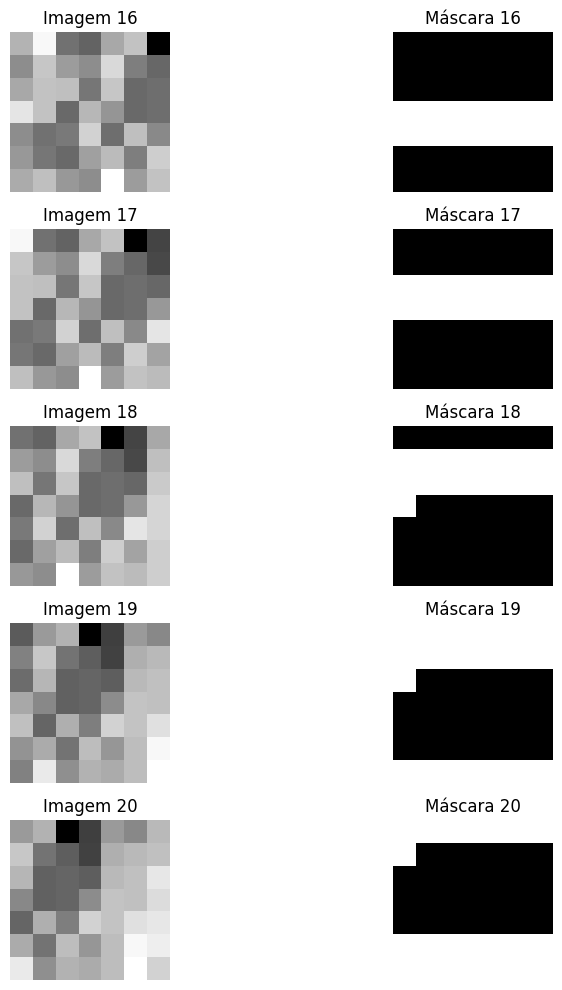

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Carregar os ficheiros .npy
X_train = np.load('Xtrain2_a.npy')
Y_train = np.load('Ytrain2_a.npy')

# Redimensionar X_train, assumindo que as imagens foram achatadas e têm dimensão 7x7
X_train_reshaped = X_train.reshape(-1, 7, 7)  # Redimensionar para (n_amostras, 7, 7)
Y_train_reshaped = Y_train.reshape(-1, 7, 7)  # Assumindo que Y_train também tem 7x7 para a máscara

# Variáveis para escolher de qual imagem até qual visualizar
start_idx = 15  # Índice da primeira imagem que queres visualizar
end_idx = 20    # Índice da última imagem +1 (não incluído)

# Exibir as amostras de imagens e suas máscaras correspondentes
num_amostras = end_idx - start_idx  # Número de amostras para visualizar
fig, axs = plt.subplots(num_amostras, 2, figsize=(10, 10))

for i in range(start_idx, end_idx):
    # Índice no subplot (relativo a start_idx)
    subplot_idx = i - start_idx

    # Imagem (redimensionada)
    axs[subplot_idx, 0].imshow(X_train_reshaped[i], cmap='gray')
    axs[subplot_idx, 0].set_title(f'Imagem {i+1}')
    axs[subplot_idx, 0].axis('off')

    # Máscara de segmentação (redimensionada)
    axs[subplot_idx, 1].imshow(Y_train_reshaped[i], cmap='gray')
    axs[subplot_idx, 1].set_title(f'Máscara {i+1}')
    axs[subplot_idx, 1].axis('off')

plt.tight_layout()
plt.show()


### Carregamento e pré-processamento

In [ ]:
# Redimensionar X_train e X_test para (n_amostras, 7, 7) pois representam janelas 7x7
X_train_reshaped = X_train.reshape(-1, 7, 7)
X_test_reshaped = X_test.reshape(-1, 7, 7)

# Y_train já está em forma achatada, mas mantemos o formato para a classificação binária
Y_train_reshaped = Y_train.reshape(-1)

# Verificar as novas formas
print("Forma de X_train (7x7 patches):", X_train_reshaped.shape)
print("Forma de Y_train (máscaras achatadas):", Y_train_reshaped.shape)
print("Forma de X_test (7x7 patches):", X_test_reshaped.shape)


### Extração das Janelas de 7x7 (Patches)


In [ ]:
from skimage.util import view_as_windows

# Função para extrair as janelas de 7x7 ao redor de cada pixel de uma imagem 48x48
def extract_patches(imgs, patch_size=7):
    patches = []
    for img in imgs:
        # Gera janelas de 7x7
        img_patches = view_as_windows(img, (patch_size, patch_size))
        # Achata as janelas para um vetor 1D de 49 elementos
        img_patches = img_patches.reshape(-1, patch_size * patch_size)
        patches.append(img_patches)
    return np.vstack(patches)

# Extrair janelas de 7x7 para X_train e X_test
X_train_patches = extract_patches(X_train_reshaped)
X_test_patches = extract_patches(X_test_reshaped)

# Achatar Y_train para combinar com o número de janelas extraídas
Y_train_flat = Y_train_reshaped.reshape(-1)

# Verificar as dimensões após a extração de janelas
print("Forma de X_train_patches:", X_train_patches.shape)  # Deve ser (n_amostras, 49)
print("Forma de Y_train_flat:", Y_train_flat.shape)        # Deve ser (n_amostras,)


### Treinador do classificador

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score

# Dividir o conjunto de treino para validação (opcional, para avaliação preliminar)
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(
    X_train_patches, Y_train_flat, test_size=0.2, random_state=42
)

# Inicializar o classificador
clf = LogisticRegression(max_iter=1000, random_state=42)

# Treinar o classificador
clf.fit(X_train_split, Y_train_split)

# Prever os rótulos no conjunto de validação
Y_val_pred = clf.predict(X_val_split)

# Avaliar a acurácia balanceada
balanced_acc = balanced_accuracy_score(Y_val_split, Y_val_pred)
print("Precisão Balanceada na validação:", balanced_acc)


### Gráficos

In [ ]:
import matplotlib.pyplot as plt

# Supondo que você tenha um modelo Keras e tenha treinado assim:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs)

# Verifique o que está armazenado em history
print(history.history.keys())  # Isso deve mostrar 'loss', 'accuracy', 'val_loss', 'val_accuracy'

# Plotar a perda
plt.figure(figsize=(12, 5))

# Gráfico de Perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.title('Gráfico de Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Gráfico de Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Gráfico de Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print(f'Perda no Teste: {test_loss}')
print(f'Acurácia no Teste: {test_accuracy}')

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print(f'Perda no Teste: {test_loss}')
print(f'Acurácia no Teste: {test_accuracy}')

# Adicione valores de perda e acurácia de teste ao histórico
history.history['test_loss'] = [test_loss] * len(history.history['loss'])
history.history['test_accuracy'] = [test_accuracy] * len(history.history['accuracy'])

# Plotar a perda
plt.figure(figsize=(12, 5))

# Gráfico de Perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.plot(history.history['test_loss'], label='Loss de Teste', linestyle='--')
plt.title('Gráfico de Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Gráfico de Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.plot(history.history['test_accuracy'], label='Acurácia de Teste', linestyle='--')
plt.title('Gráfico de Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()



### Avaliação no conjunto de Teste

In [ ]:
# Prever os rótulos para o conjunto de teste
Y_test_pred = clf.predict(X_test_patches)

# Verifique o tamanho do Y_test_pred
print(f"Tamanho de Y_test_pred: {Y_test_pred.shape}")

# O tamanho total de Y_test_pred deve ser um múltiplo de 2304 para ser redimensionado para (48, 48)
tamanho_total = Y_test_pred.size
print(f"Tamanho total: {tamanho_total}")

# Verifique se o tamanho é compatível com o reshape
num_pixels_por_imagem = 48 * 48  # Número de pixels em cada imagem 48x48
num_imagens = tamanho_total // num_pixels_por_imagem

# Se o tamanho total não é um múltiplo de 2304, temos que lidar com isso
if tamanho_total % num_pixels_por_imagem == 0:
    # Redimensionar Y_test_pred para o formato original da imagem 48x48
    Y_test_pred_reshaped = Y_test_pred.reshape(num_imagens, 48, 48)
else:
    print("O tamanho de Y_test_pred não é compatível com o reshape para (48, 48).")
    print(f"Número de imagens calculado: {num_imagens}")
    print("Por favor, verifique a saída do clf.predict e o formato de X_test_patches.")

# Se o reshape foi bem-sucedido, visualize algumas predições (opcional)
if 'Y_test_pred_reshaped' in locals():
    import matplotlib.pyplot as plt

    num_amostras = min(5, num_imagens)  # Número de amostras para visualizar
    fig, axs = plt.subplots(num_amostras, 2, figsize=(10, 10))

    for i in range(num_amostras):
        # Imagem original
        axs[i, 0].imshow(X_test_reshaped[i], cmap='gray')
        axs[i, 0].set_title(f'Imagem de Teste {i+1}')
        axs[i, 0].axis('off')

        # Predição da máscara
        axs[i, 1].imshow(Y_test_pred_reshaped[i], cmap='gray')
        axs[i, 1].set_title(f'Predição da Máscara {i+1}')
        axs[i, 1].axis('off')

    plt.tight_layout()
    plt.show()
